# Th0Th - a complex example with known heterogeneity



In [1]:
# Import IBIS
import sys
from ibis_codes_2025 import IBIS_Main

Moseley et al. (2015) present U-Th analyses from a Holocene age speleothem. Moseley et al. (2015) note four distinct growth regions and perform isochron analysis to establish (230Th/232Th)A0 for each. The authors report a range of values from ~3 to ~25 with each layer have a distinct value - ~3, 11, 18, and 25. This present an interesting case for the applicability of Th0Th to such a complex case with know heterogeniety. However, with the model design to produce some non-parameteric distribution, the ability to handle complex multi-modal cases is in-built. We do not separate this data by distinct growth interval but consider it a complete system to test if IBIS can detect potentially mulitple phases with varying (230Th/232Th)A0.

In [2]:
test = IBIS_Main.IBIS('filepath to data/Moseley_2015_All_IBIS_Input.xlsx',
    sample_name='Moseley_2015_All_IBIS',          
    MCMC_samples=600000,
    MCMC_burn_in=100000,
    MCMC_Strat_samples=500000,
    n_chains=3,
    Start_from_pickles=False, 
    show_bird=False, 
    method='thoth'
)

Data loaded successfully from /Users/jackcarter/Documents/Initial_Thorium/Moseley_2015_All_IBIS_Input.xlsx (Excel)


In [3]:
test.Get_IBIS_Bounds(); 

Bounds and uncertainties file exists and is loaded.


In [4]:
test.Set_Up_MCMC();

♻️  Loaded existing Thorium prior from
   Moseley_2015_All_IBIS_prior.pkl


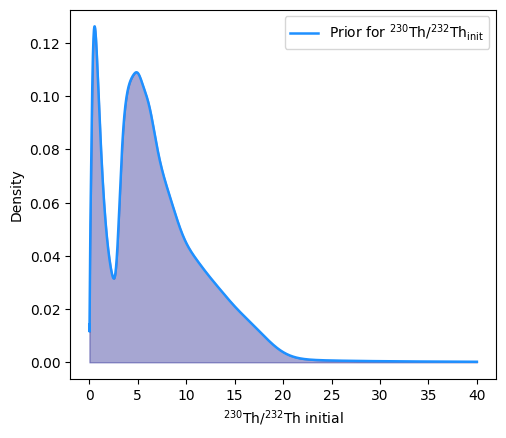

In [5]:
test.Plot_Priors();

In [6]:
import numpy as np 
# Moseley et al. (2015) isochron data
x_ = np.array([3.1, 18.5, 11.9, 24.4])
x_err = np.array([6.2, 5.4, 2.2, 5.6])

Text(0, 0.5, 'Density')

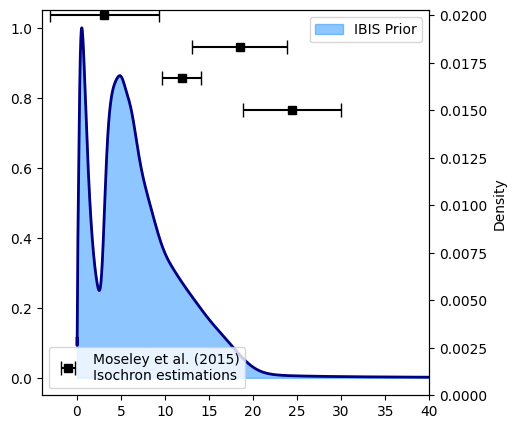

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.plot(test.thor_kde.x, test.thor_kde.y/test.thor_kde.y.max(), color = 'navy', lw = 2)
ax.fill_between(test.thor_kde.x, test.thor_kde.y/test.thor_kde.y.max(), color = 'dodgerblue', alpha = 0.5, 
                   label = 'IBIS Prior')
ax.set_xlim(-4, 40)

ax2 = ax.twinx()
for i in range(len(x_)): 
    ax2.errorbar(y = np.linspace(0.02, 0.015, len(x_))[i], x = x_[i], xerr = x_err[i], 
               fmt = 's', capsize = 5, color = 'k', 
               label = 'Moseley et al. (2015)\nIsochron estimations'if i == 0 else None)
ax2.legend(fontsize = 10)
ax.legend(fontsize = 10)
ax2.set_ylim(bottom = 0.0)
ax2.set_xlabel('$^{230}$Th$_{0}$')
ax2.set_ylabel('Density')

In [8]:
test.Run_MCMC(); 

Generating new starting θ’s


In [9]:
test.Model_Initial_Thorium()

(array([15.97258472, 18.28648758, 17.05710602,  4.30175352, 22.63836861,
        20.50621796,  8.0522356 , 11.64346504,  4.65568876,  5.86293125,
         1.44851851, 15.54042435, 15.4425869 ,  5.26019096, 17.67215347,
        15.6069479 ,  9.91333008,  8.38238811,  3.86918235,  8.03303909,
         5.3322711 , 26.15275192,  0.75371939,  0.82561791,  1.35368216,
         0.71612579,  4.17830896]),
 [array([3.88338375, 4.04157352, 1.68913174, 3.86835817, 0.68265152,
         2.03748131, 1.83402014, 0.14681911, 1.48974228, 1.01694441,
         1.21331415, 1.8957262 , 3.38528633, 3.90269244, 0.90590477,
         3.43867397, 0.9468689 , 4.57614779, 0.99074602, 2.02687311,
         0.68137455, 1.09137344, 0.5990971 , 0.64911048, 1.11142945,
         0.53724129, 3.70675418]),
  array([4.97381115, 6.44742584, 2.12811852, 4.46036291, 1.15827179,
         2.85636902, 2.66805267, 0.25864697, 1.45507145, 1.80160475,
         5.6745379 , 1.76020241, 2.24514771, 2.42445612, 0.62706947,
         2.5

In [10]:
test.SaveSummary()

Summary saved to Moseley_2015_All_IBIS_ibis_summary.csv


In [16]:
# Get Values and Make estimate
import pandas as pd

df = pd.read_csv('Moseley_2015_All_IBIS_ibis_summary.csv')

In [18]:
ibis_layer_1 = df[df['Depth_Meas'] == 7]
ibis_layer_2 = df[df['Depth_Meas'] == 44]
ibis_layer_3 = df[df['Depth_Meas'] == 108]
ibis_layer_4 = df[df['Depth_Meas'] == 158]

In [20]:
ibis_dict = [ibis_layer_1, ibis_layer_2, ibis_layer_3, ibis_layer_4]

In [19]:
moseley_ages_1_isolayer = np.array([6.3, 5.9, 6.2, 5.5, 7.2])
moseley_err_1_isolayer = np.array([0.5, 0.2, 0.6, 0.3, 1.2])


moseley_ages_2_isolayer = np.array([4.5, 5.5,  5.9])
moseley_err_2_isolayer = np.array([7.7, 1.3, 1.0])

moseley_ages_3_isolayer = np.array([7.4, 7.2, 7.4, 7.7])
moseley_err_3_isolayer = np.array([0.2, 0.2, 0.2, 0.7])


moseley_ages_4_isolayer = np.array([7.9, 8.3, 7.6])
moseley_err_4_isolayer = np.array([0.5, 0.3, 0.9])

In [24]:
moseley_ages = [moseley_ages_1_isolayer, moseley_ages_2_isolayer, moseley_ages_3_isolayer, moseley_ages_4_isolayer]
moseley_err = [moseley_err_1_isolayer, moseley_err_2_isolayer, moseley_err_3_isolayer, moseley_err_4_isolayer]

In [31]:
ibis_layer_1.columns

Index(['Unnamed: 0', 'Depth_Meas', 'Depth_Meas_err', 'age', 'age_err',
       'initial thorium', 'initial thorium err', 'initial uranium',
       'initial uranium err', 'age_low68', 'age_high68', 'age_low95',
       'age_high95', 'Th0_low68', 'Th0_high68', 'Th0_low95', 'Th0_high95',
       'U0_low68', 'U0_high68', 'U0_low95', 'U0_high95'],
      dtype='object')

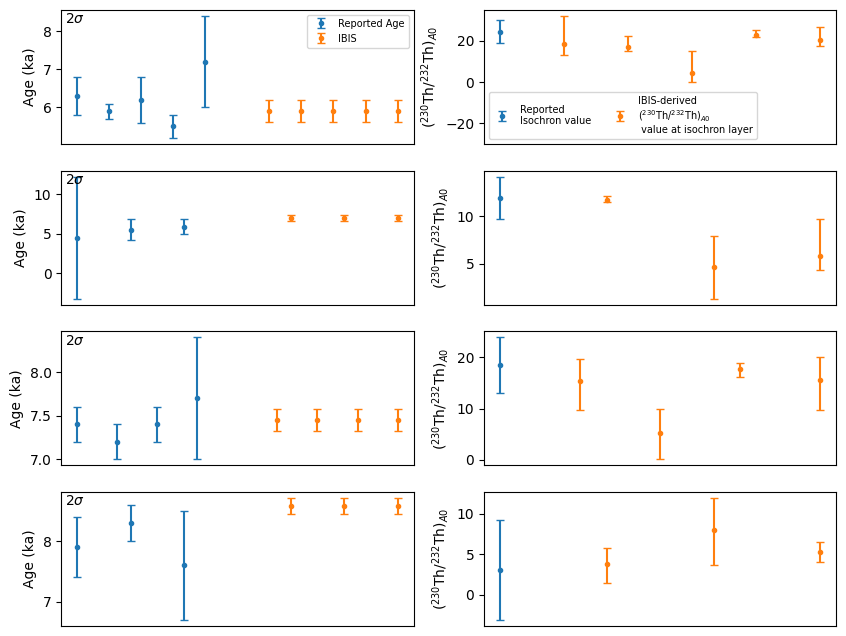

In [64]:
fig, ax = plt.subplots(4, 2, figsize = (10, 8))

left_axes = ax[:, 0].ravel()          # (0,0), (1,0), (2,0), (3,0)
for i, ax_ in enumerate(left_axes):
    size = moseley_ages[i].size
    ax_.errorbar(np.arange(size), 
    y = moseley_ages[i], 
    yerr = moseley_err[i], fmt = 'o', 
                capsize = 3, markersize = 3, 
                label= 'Reported Age')

    ibis = ibis_dict[i]
    ax_.errorbar(np.arange(size +1, size + size + 1), 
    y = ibis['age'].values/1e3 ,
    yerr = 2*ibis['age_err'].values/1e3, fmt = 'o', 
                capsize = 3, markersize = 3, 
                label = 'IBIS')

    ax_.set_xticks([])
    ax_.set_ylabel('Age (ka)')
    ax_.text(0.01, 0.9, s = '2$\sigma$', 
            transform = ax_.transAxes)
    if i == 0:
        ax_.legend(fontsize = 7, loc = 'upper right')

right_axes = ax[:, 1].ravel()  
for i, ax_ in enumerate(right_axes):
    ax_.errorbar(1, y = x_[::-1][i], 
                yerr= x_err[::-1][i], 
                capsize = 3, 
                markersize = 3, fmt= 'o', 
                label = 'Reported\nIsochron value')

    ibis = ibis_dict[i]
    ax_.errorbar(np.arange(2, ibis.shape[0] + 2),  y = ibis['initial thorium'].values, 
                yerr= np.array([ibis['Th0_low95'], ibis['Th0_high95']]), 
                capsize = 3, 
                markersize = 3, fmt= 'o', 
                label ='IBIS-derived\n($^{230}$Th/$^{232}$Th)$_{A0}$\n value at isochron layer')

    ax_.set_xticks([])
    ax_.set_ylabel('($^{230}$Th/$^{232}$Th)$_{A0}$')
    
    if i == 0:
        ax_.set_ylim(-30, 35)
        ax_.legend(fontsize = 7, ncol = 2)